In [31]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Question  1A

In [32]:
# categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
# categories=categories,\
remove = ('headers', 'footers', 'quotes')
docs = fetch_20newsgroups(subset='train',  remove=remove)
docs_df = pd.DataFrame(docs.data, columns=["text"])
docs_df['topic'] = pd.Series(data=docs.target, index=docs_df.index)
docs_df

,text,topic
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [33]:
stop_words = stopwords.words('english')
sw1 = ['dont','im','also','it','thank','thanks','could','get','would','even','know','say','much','well']
stop_words.extend(sw1)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
docs_df['text'] = docs_df['text'].str.lower()
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
# docs_df['text'] = docs_df['text'].apply(lambda x: lemmatizer.lemmatize(x))
docs_df['text'] = docs_df['text'].apply(lambda x: stemmer.stem(x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub(PUNCTUATION, '', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('\n', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('[\d-]', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('_',' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
docs_df

,text,topic
0,wondering anyone enlighten car saw day door sp...,7
1,fair number brave souls upgraded si clock osci...,4
2,folks mac plus finally gave ghost weekend star...,4
3,weiteks addressphone number id like informatio...,1
4,article c owcbn pworldstdcom tombakerworldstdc...,14
...,...,...
11309,dn nyedacnsvaxuwecedu david nye dn neurology d...,13
11310,old mac k mac plus problem screens blank somet...,4
11311,installed dx cpu clone motherboard tried mount...,3
11312,require hypersphere space points specifies sph...,1


# Question  1B i

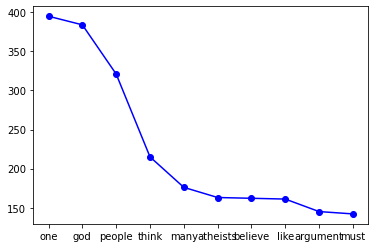

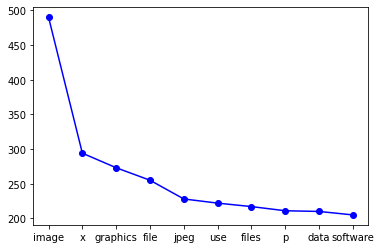

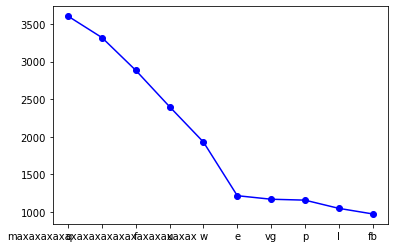

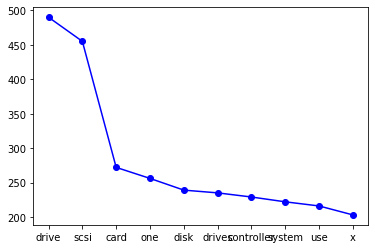

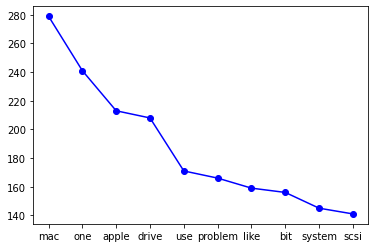

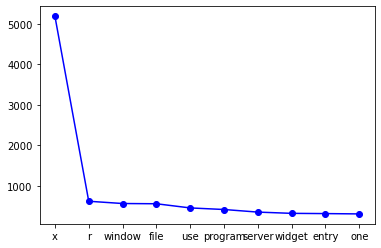

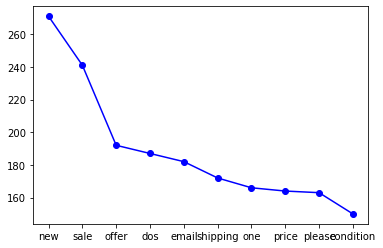

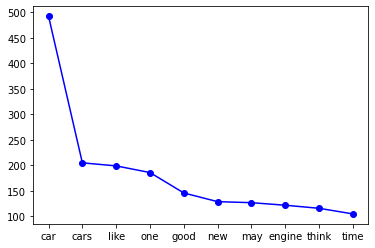

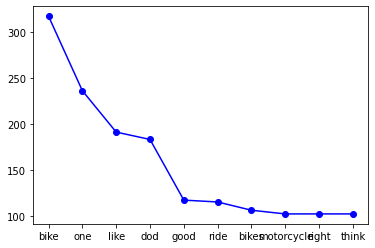

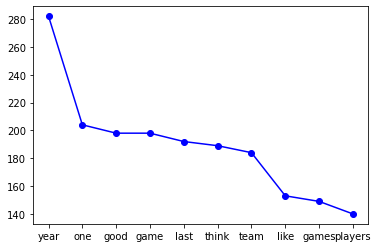

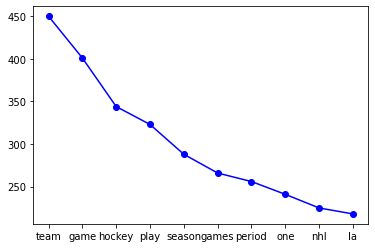

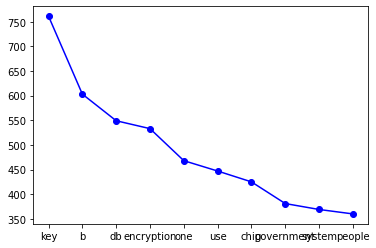

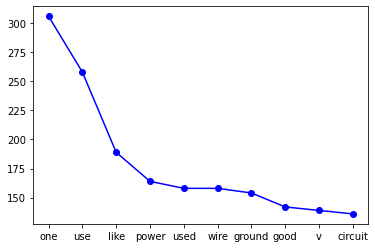

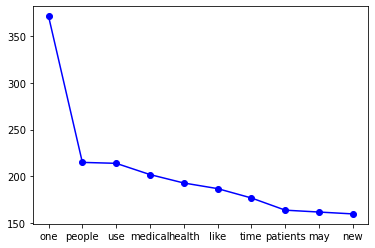

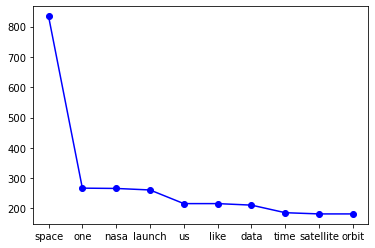

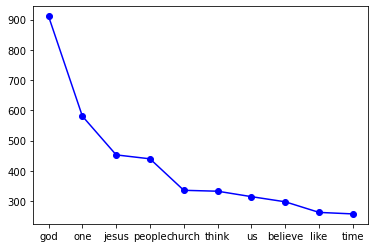

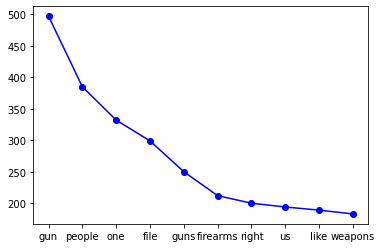

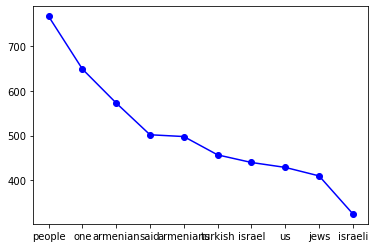

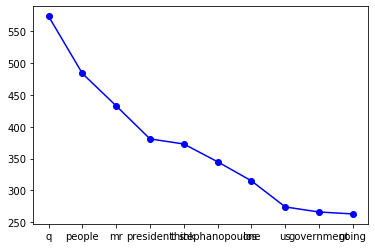

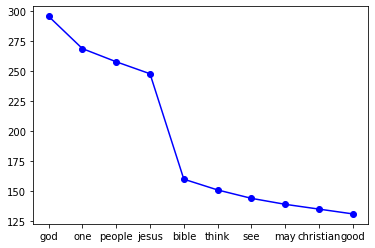

<Figure size 432x288 with 0 Axes>

In [34]:
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    common = ' '.join(commondf['text'])
    common = pd.Series(common.split()).value_counts()[:10]
    commondft = pd.DataFrame(common)
    commondft.rename( columns={0 :'count'}, inplace=True )
    plt.plot(commondft['count'], color='blue', marker='o')
    plt.show()
    plt.savefig('plot.png')
    



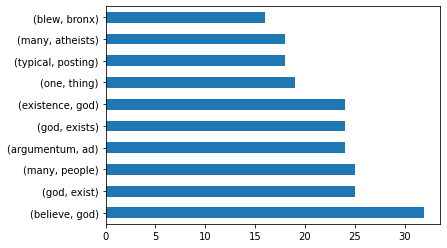

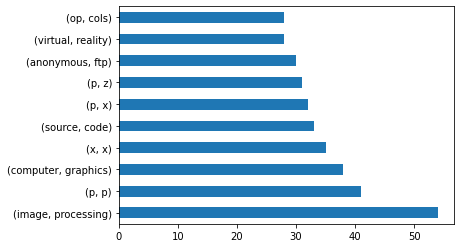

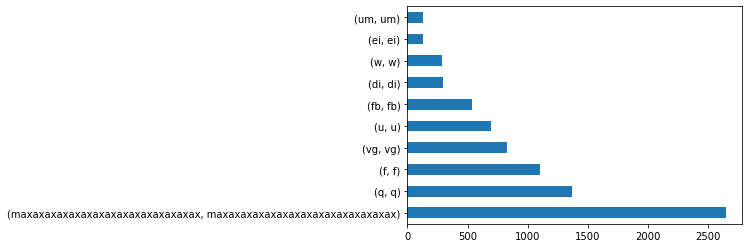

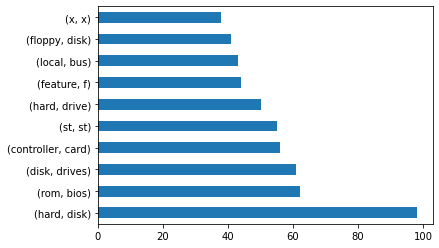

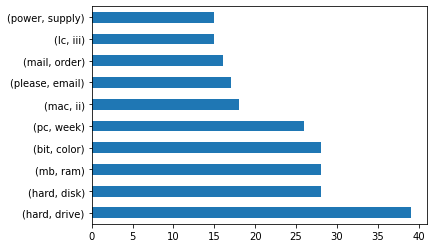

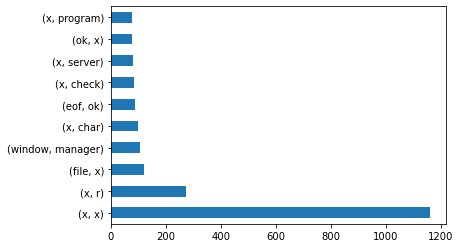

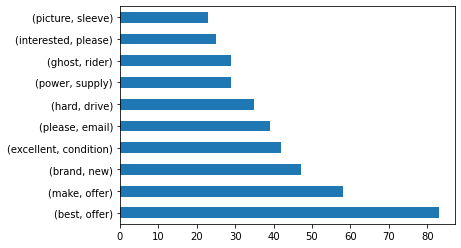

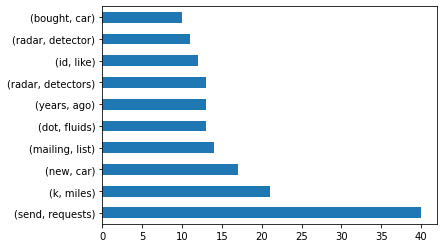

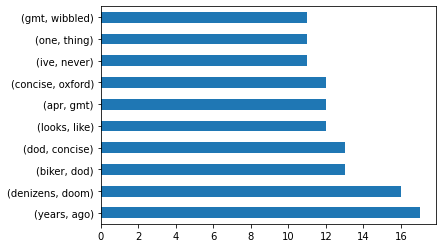

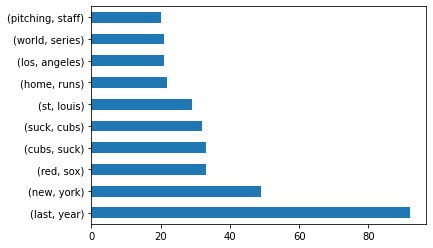

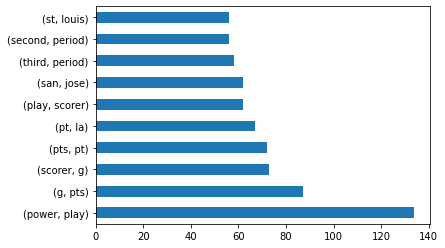

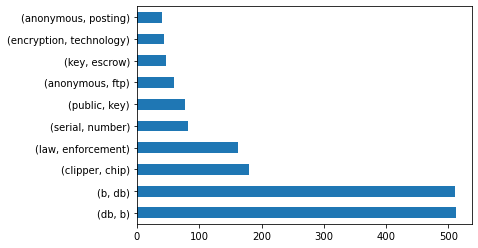

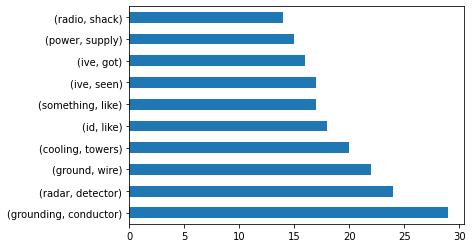

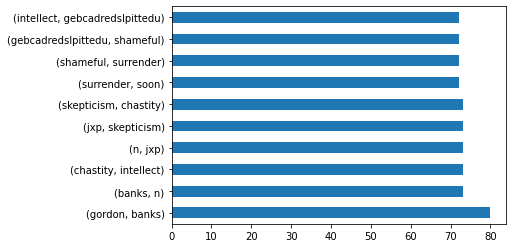

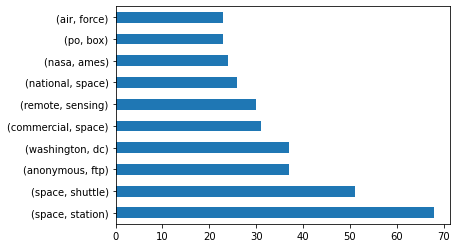

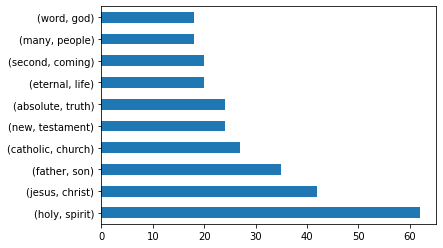

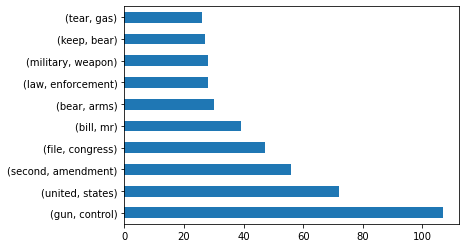

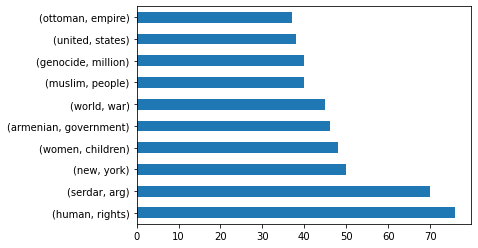

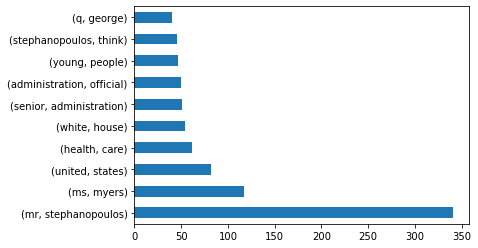

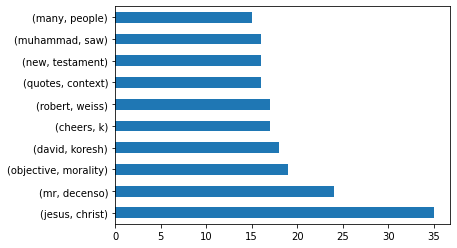

In [44]:
for x in range(20):
    bigramdf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in bigramdf['text']]).split()
    bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
    bigrams.plot(kind = "barh")
    plt.show()

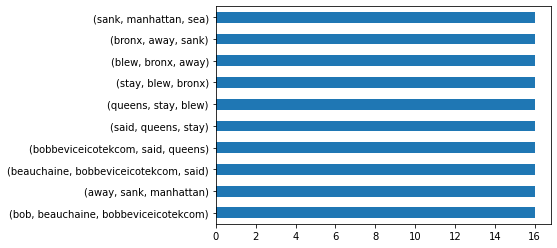

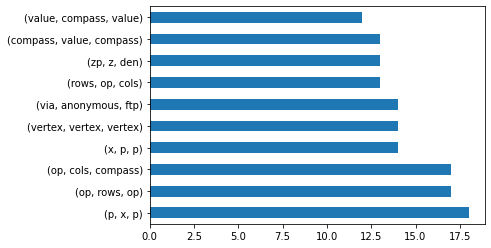

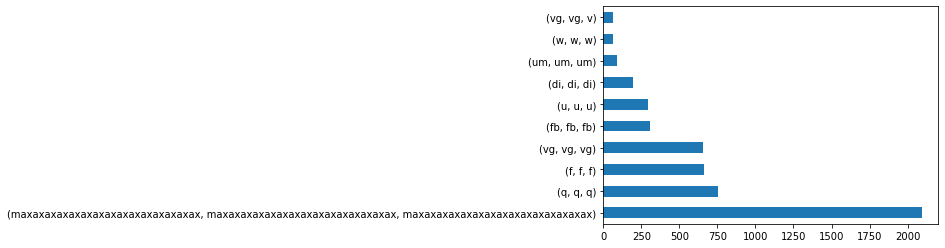

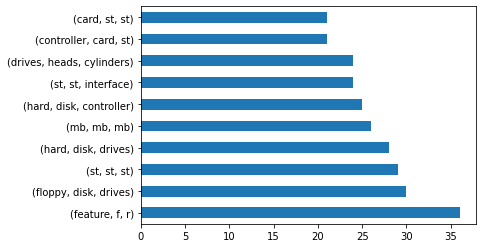

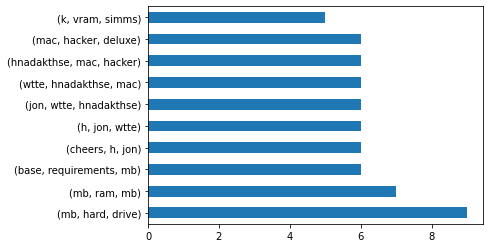

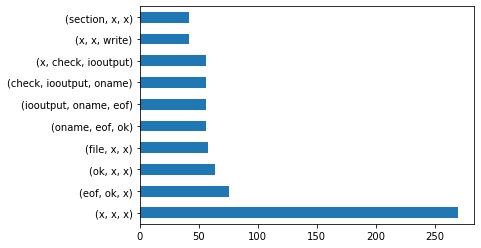

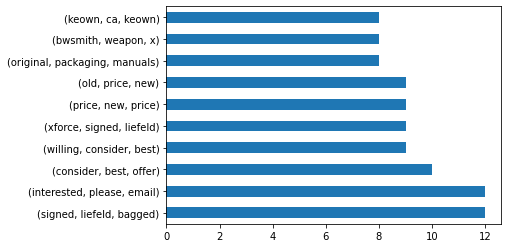

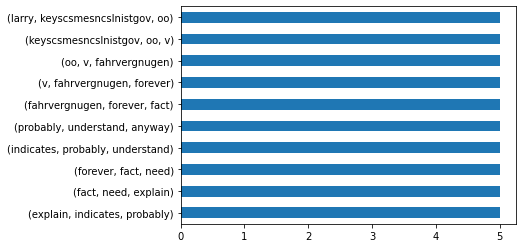

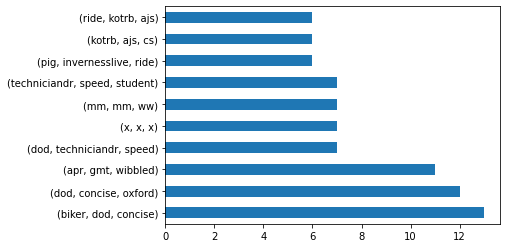

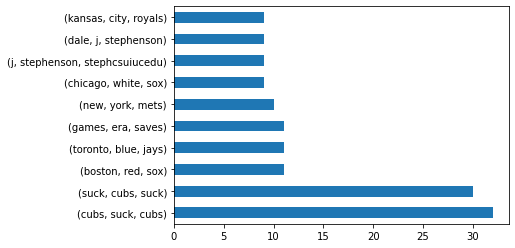

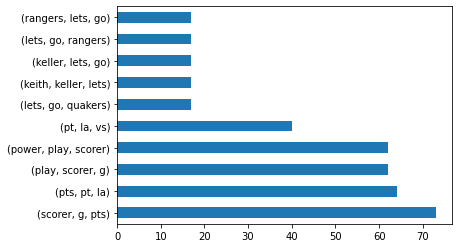

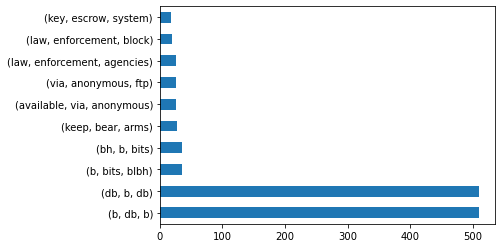

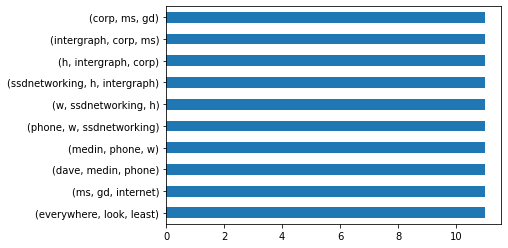

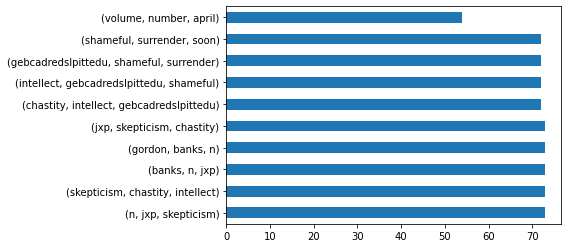

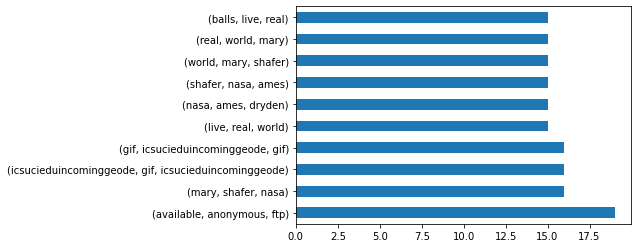

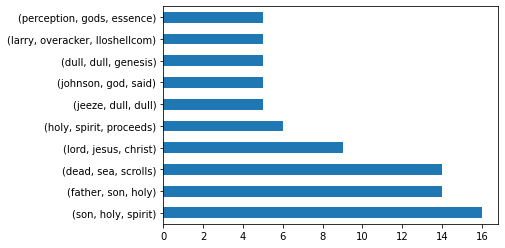

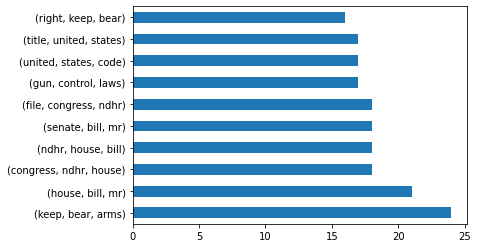

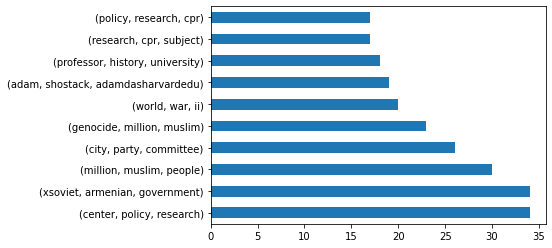

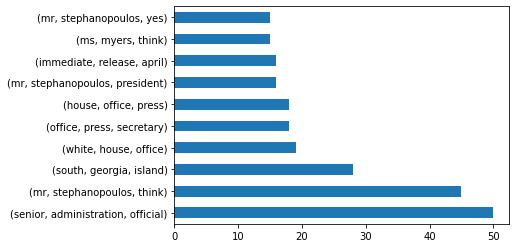

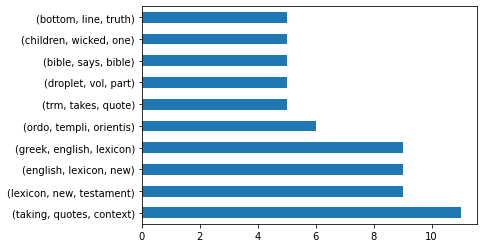

In [36]:
for x in range(20):
    trigramdf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in trigramdf['text']]).split()
    bigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
    bigrams.plot(kind = "barh")
    plt.show()

# Question  1B ii

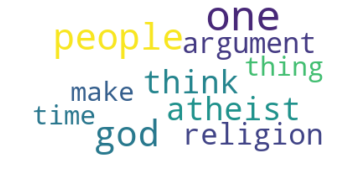

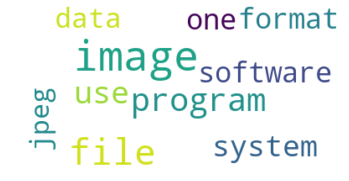

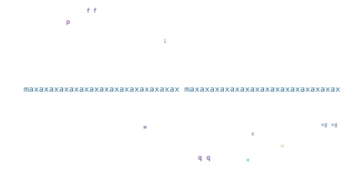

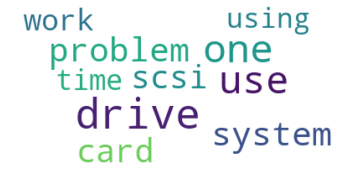

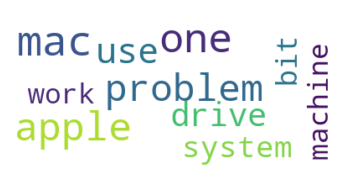

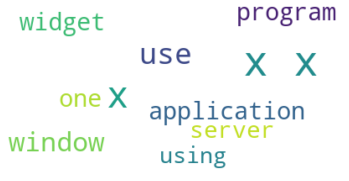

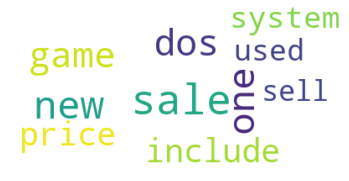

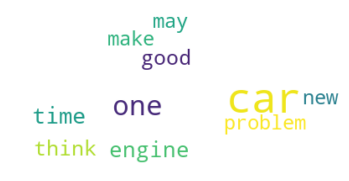

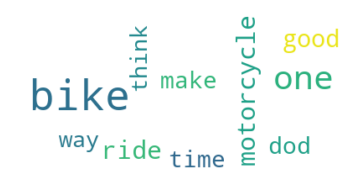

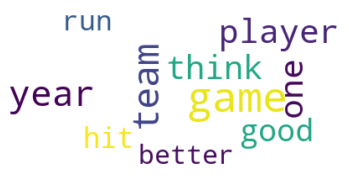

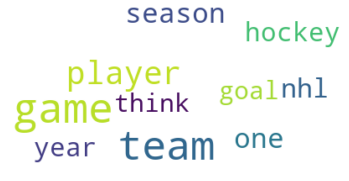

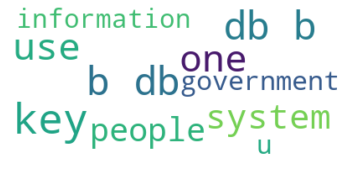

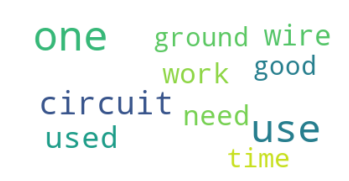

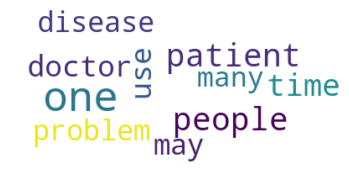

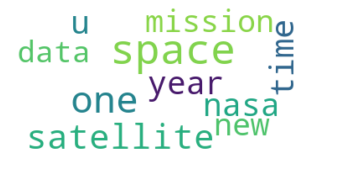

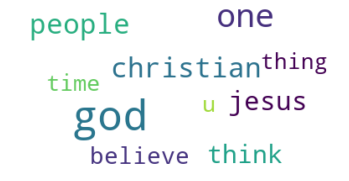

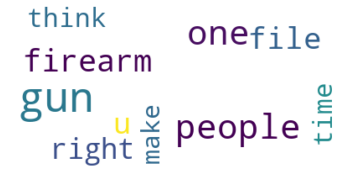

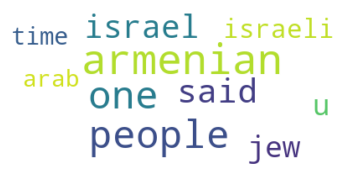

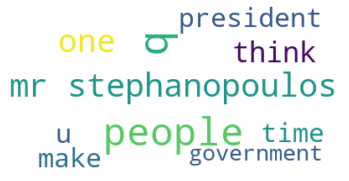

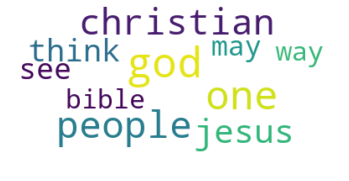

In [37]:
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    text = ' '.join(commondf['text'])
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Question  1B iii

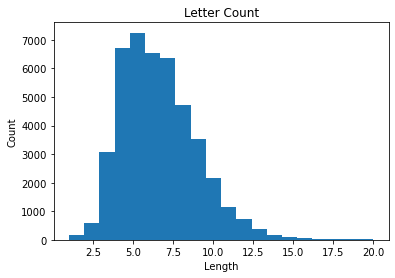

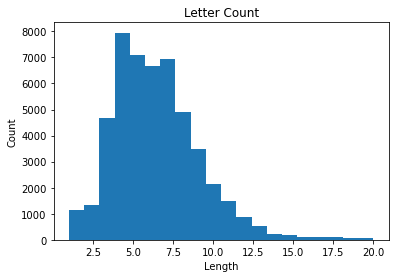

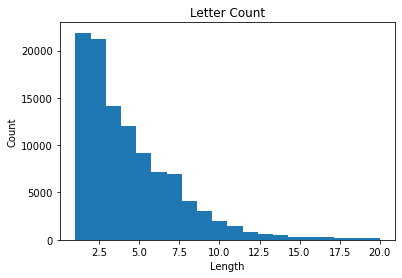

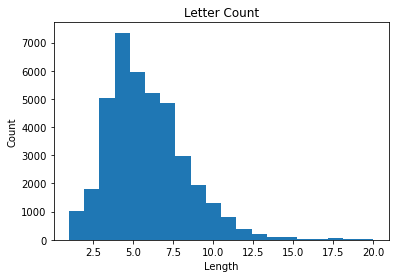

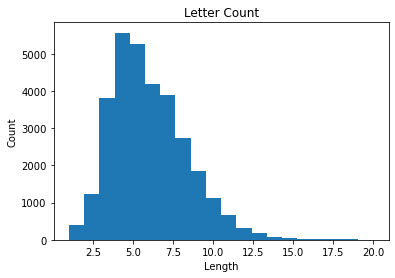

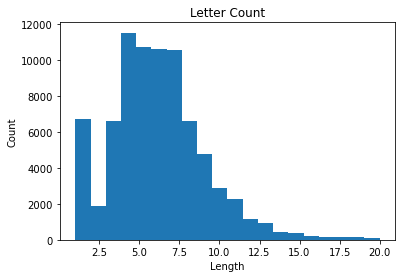

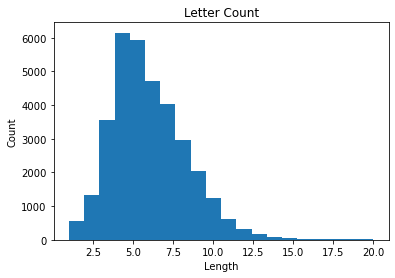

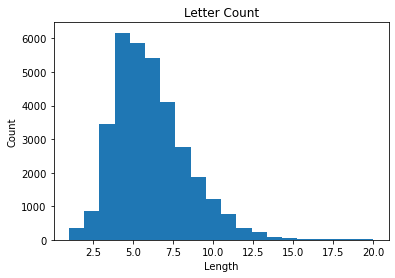

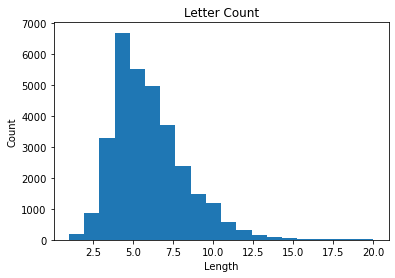

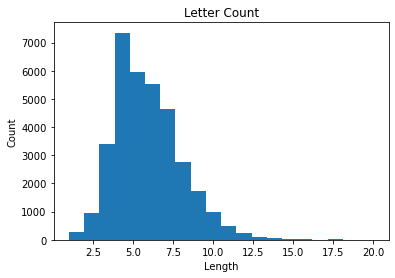

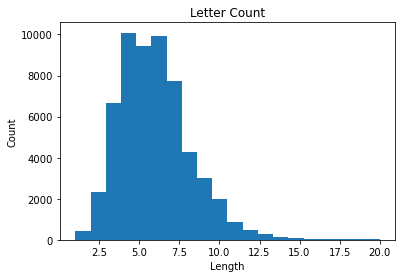

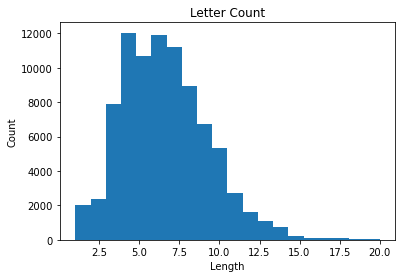

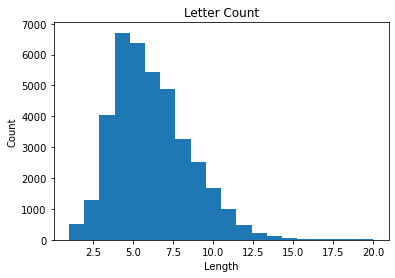

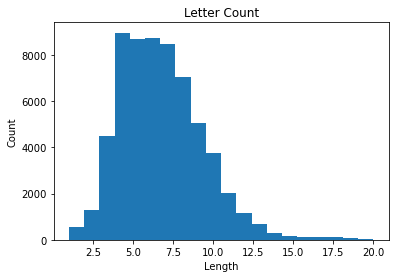

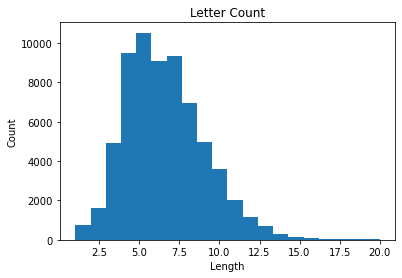

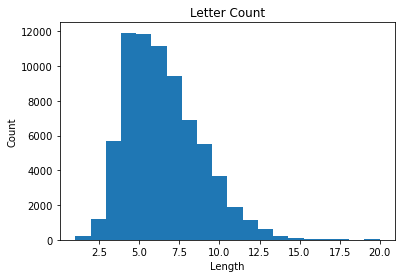

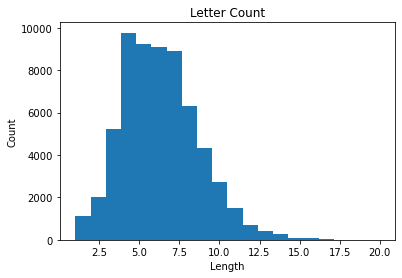

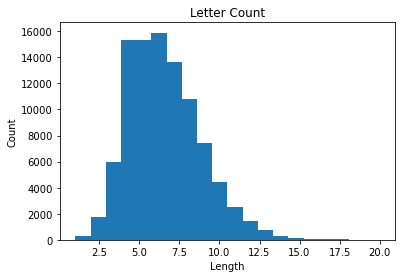

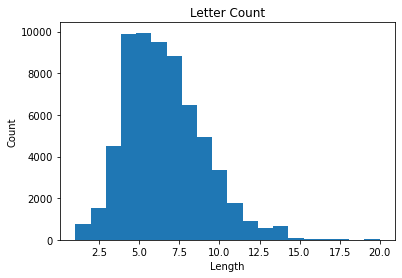

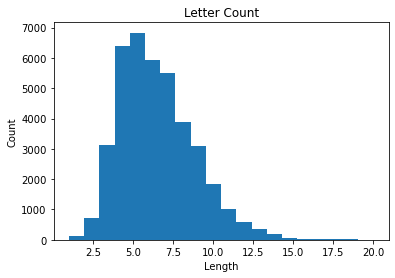

In [38]:
#letter count
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in commondf['text']]).split()
    mylist = []
    for i in words:
        mylist.append(len(i))   
    plt.title("Letter Count")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.hist(mylist, bins=20, range=[1, 20])
    plt.show()
 

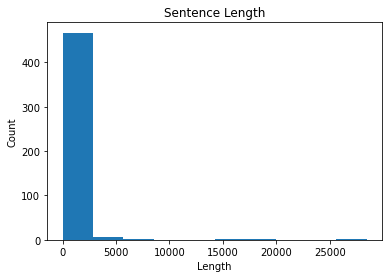

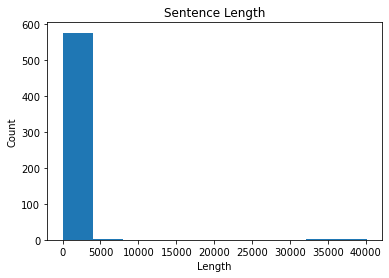

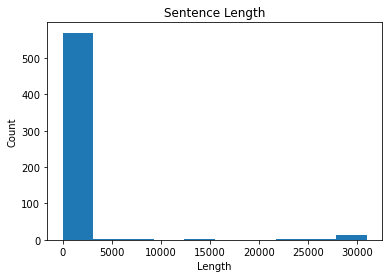

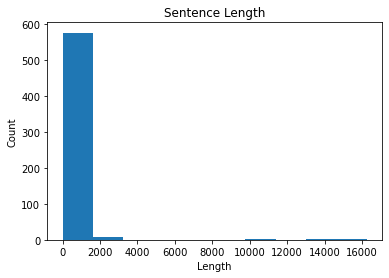

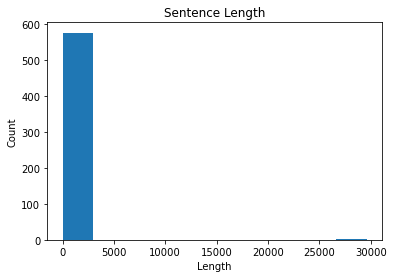

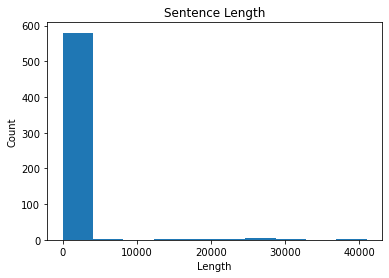

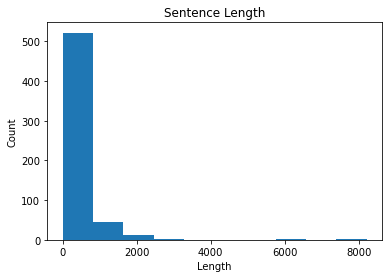

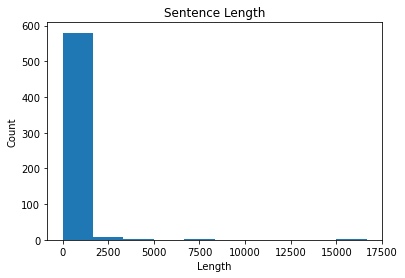

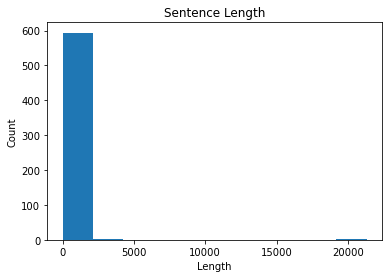

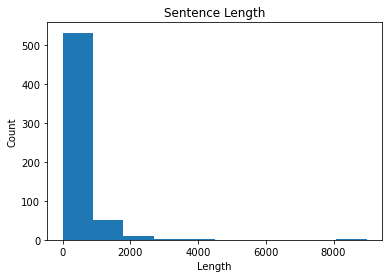

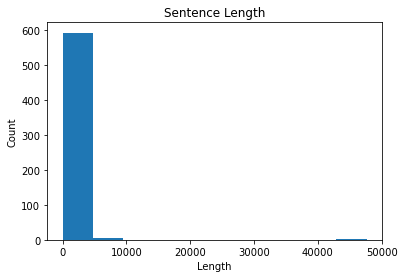

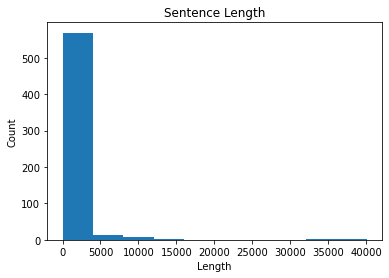

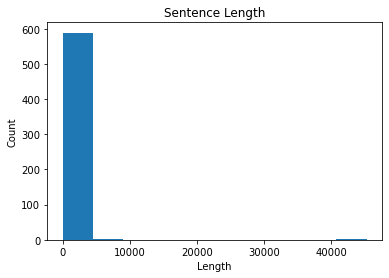

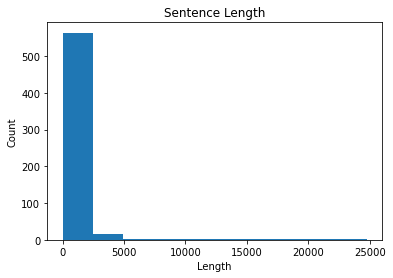

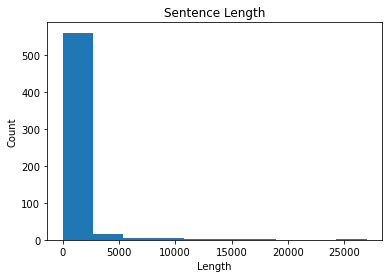

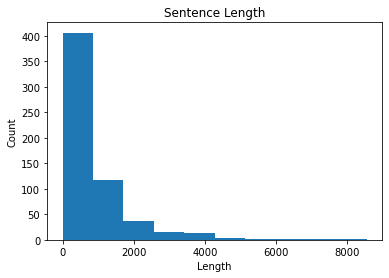

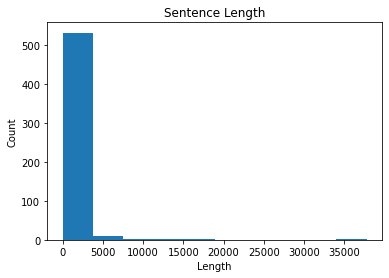

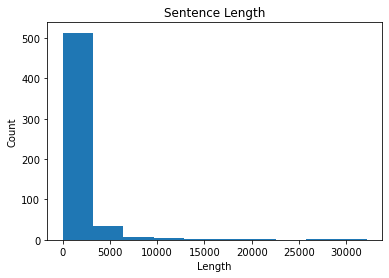

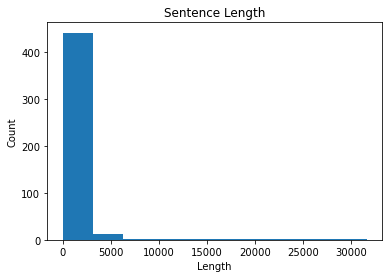

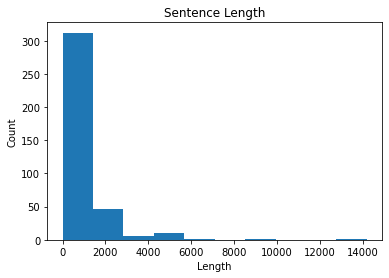

In [39]:
#SENTENCE LENGTH 
docs_df['len'] = docs_df['text'].apply(len)
docs_df

for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    plt.title("Sentence Length")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.hist(commondf['len'])
    plt.show()
    

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

v = TfidfVectorizer()
x = v.fit_transform(docs_df['text'])
df_tfidf = pd.DataFrame(x.todense())

lda_model=LatentDirichletAllocation(n_components=4,learning_method='online',random_state=42,max_iter=100) 
lda_top=lda_model.fit_transform(x.todense())

svd_model = TruncatedSVD(n_components=4,algorithm='randomized',n_iter=10)
svd_top = svd_model.fit_transform(x.todense())

In [41]:
vocab = v.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0:  retarded melittin rectum cockroaches libxmulibxmuso altsexbondagehollysilvagoofyantisemite eastwick rawley aswer ieeeannounc 

Topic 1:  addresser eridanchuvashiasu inguiry tesrt farrs grapenswsesnavymil irwincmptrclonestarorg tuba computracrichardsontx postmasternortoncom 

Topic 2:  maxaxaxaxaxaxaxaxaxaxaxaxaxaxax fb vg di ww mt ik mq ei critu 

Topic 3:  one like people think use anyone good time please new 



In [42]:
for i, comp in enumerate(svd_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0:  one people like think use good time anyone god us 

Topic 1:  windows drive card email please mb dos scsi file anyone 

Topic 2:  god jesus bible windows faith christians christian believe christ card 

Topic 3:  key encryption chip clipper government keys file use program windows 

